# Tutorial : Parameter Translation
This notebook shows how rockpool translates the high level parameters to low level hardware configuraiton

In [6]:
from rockpool.devices.dynapse import BiasGenSE2
from rockpool.devices.dynapse.samna_alias import Dynapse2Parameter

import matplotlib.pyplot as plt
# %matplotlib inline
plt.rcParams['figure.figsize'] = [5.0, 3.6]
plt.rcParams['figure.dpi'] = 1200
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = "dejavuserif"
plt.rcParams["font.size"] = 12

In [7]:
biasgen = BiasGenSE2()

In [8]:
biasgen.get_coarse_fine(name="SOIF_DC_P", current_value=1e-9)


(2, 157)

In [9]:
biasgen.param_to_bias("SOIF_DC_P", Dynapse2Parameter("P", 2, 157))


9.979006911364721e-10

## Step 2 : Sweep the range

Sweep the full range of coarse and fine values

In [10]:
record = []
for coarse in range(6):
    temp = []
    for fine in range(256):
        val = biasgen.get_bias(coarse, fine, 1, "N")
        temp.append(val)
    record.append(temp)

## Step 3 : Plot 

Plot the coarse bases

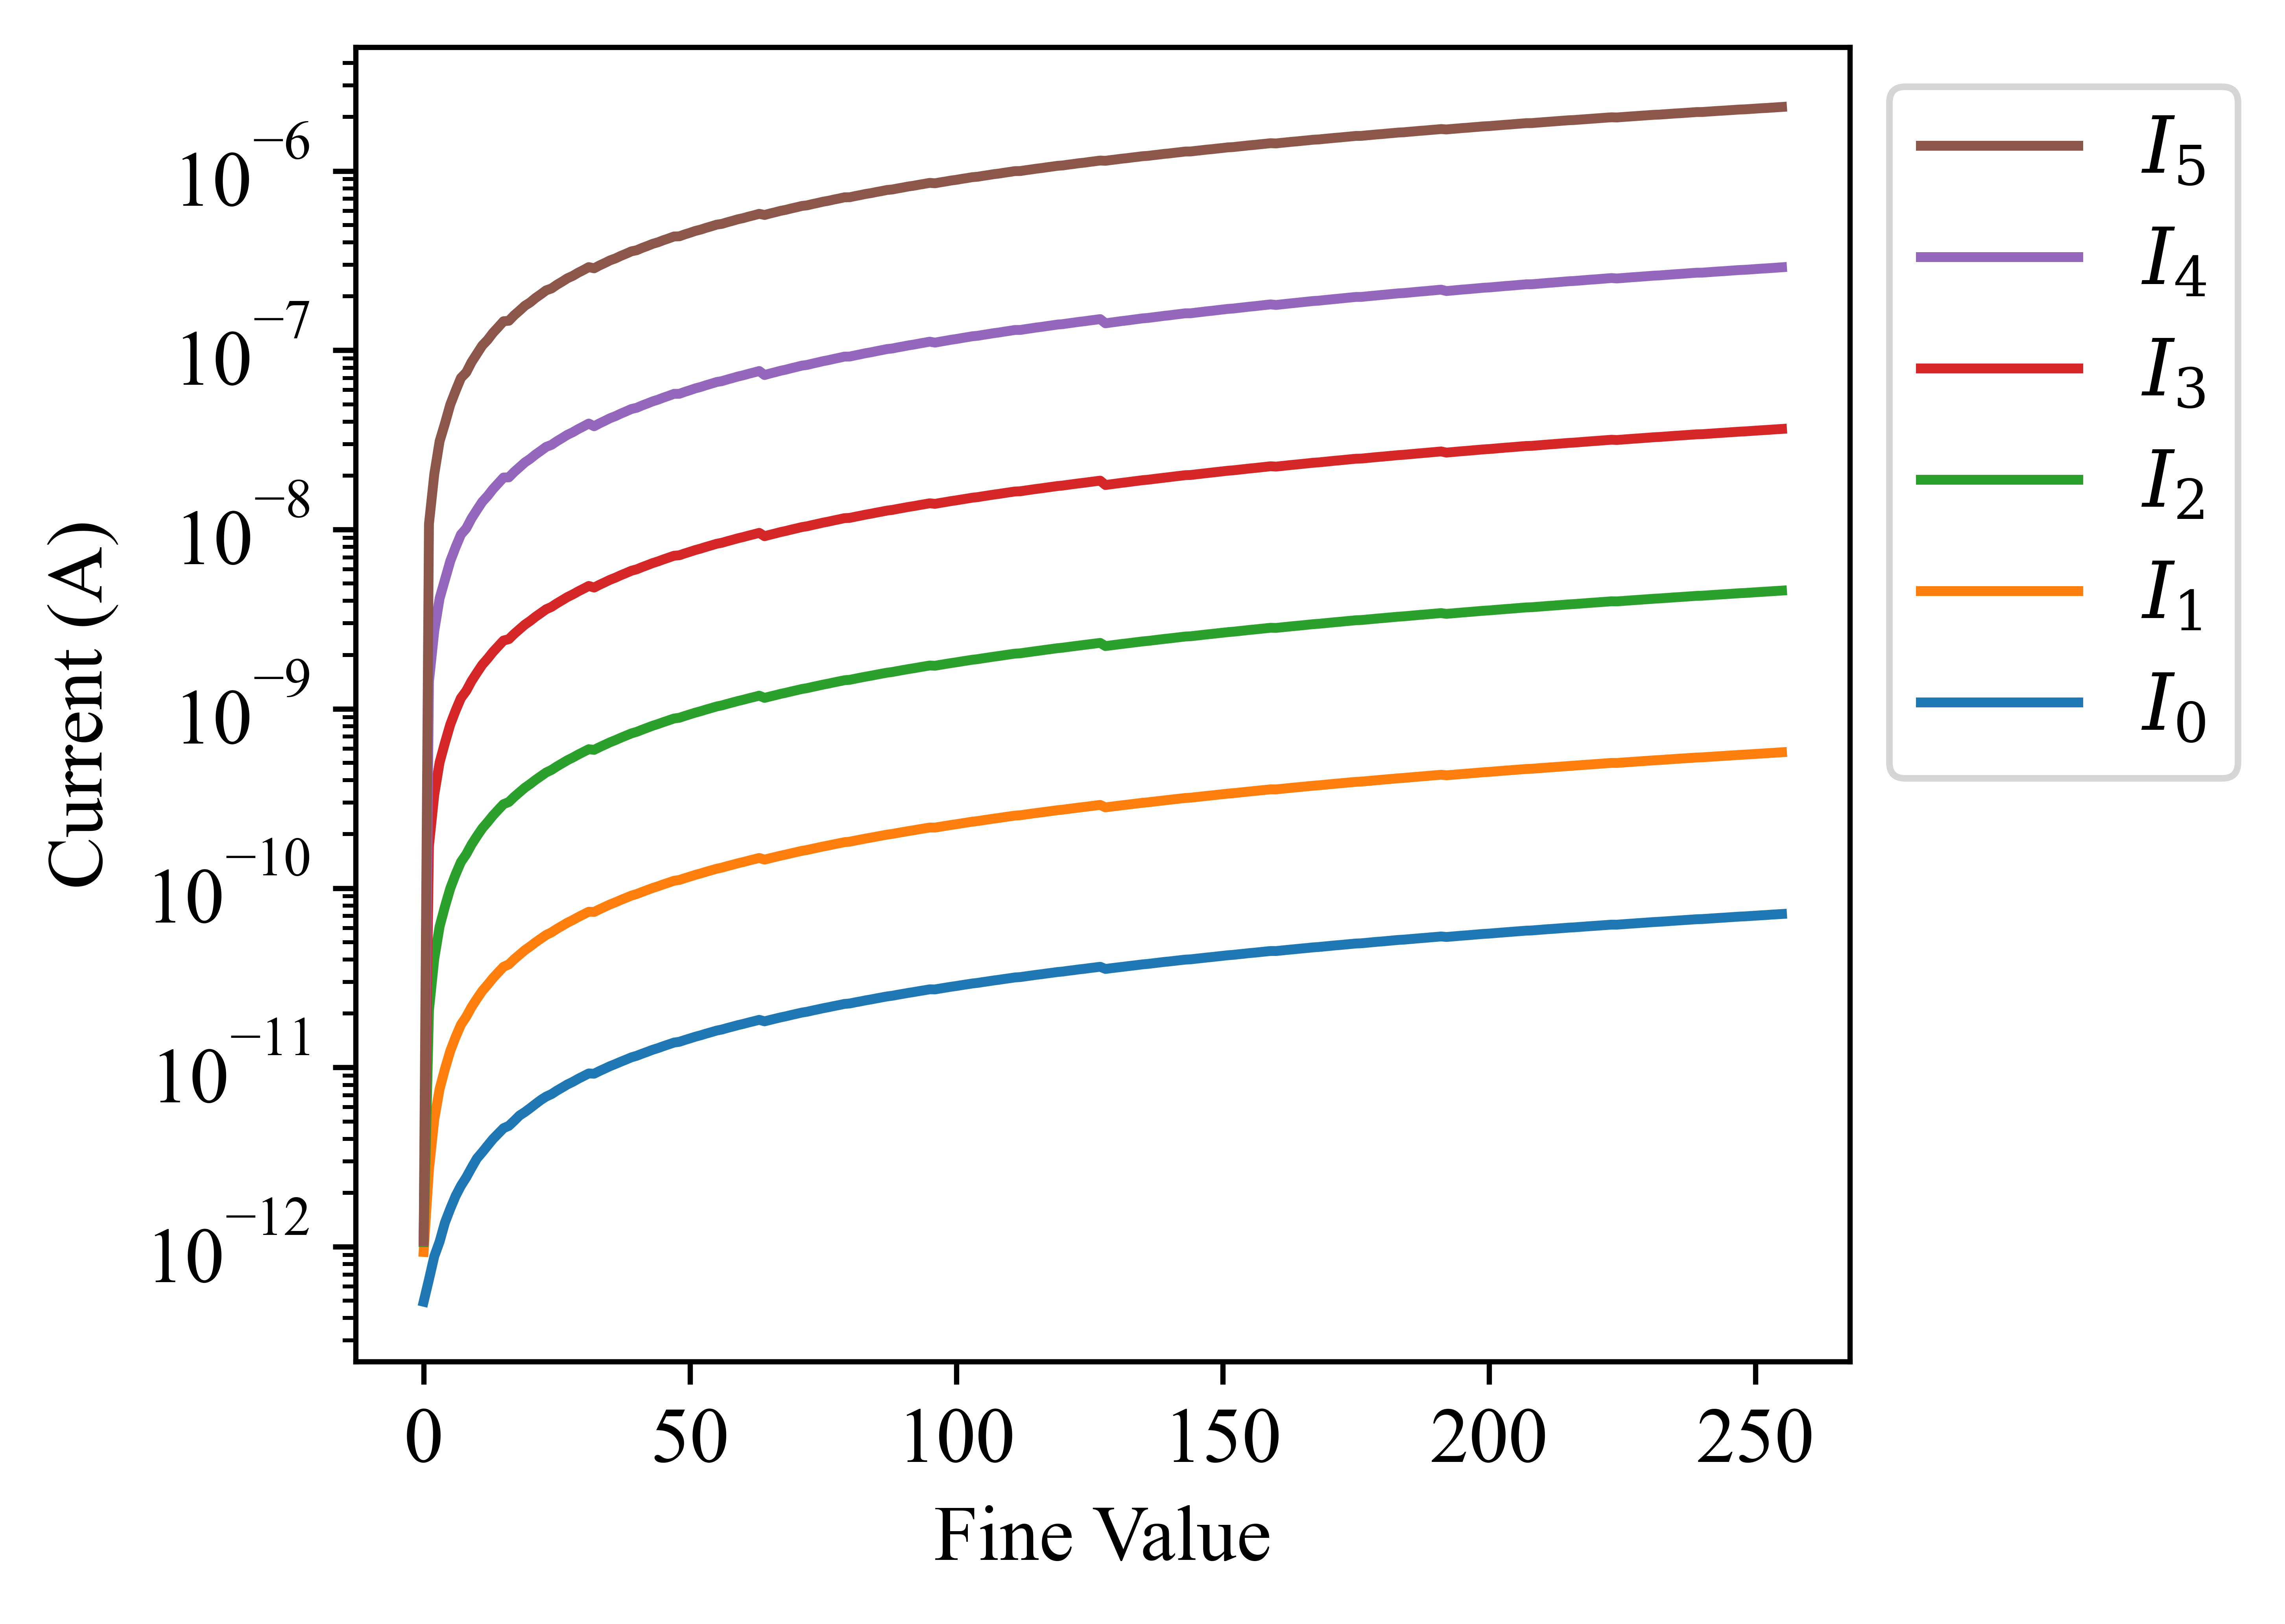

In [15]:
fig = plt.figure()

# Plot currents
for coarse in range(6):
    plt.semilogy(record[coarse], label=f"$I_{coarse}$")

# Deal with legend
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1, 1))

# Formatting
ax.set_ylabel("Current (A)")
ax.set_xlabel("Fine Value")

# Done
# plt.show()
plt.tight_layout()
